# K-Means Clustering

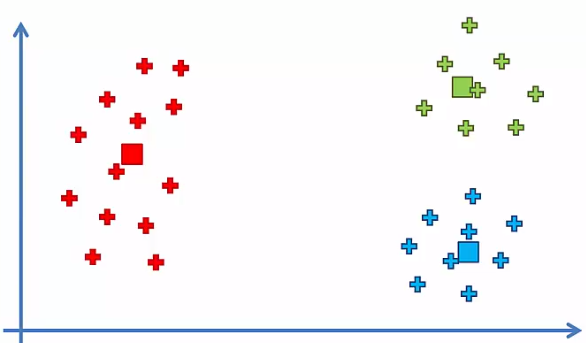

K-Means Clustering is an algorithm that allows us to **split the data into K classes**. Here are the specific steps:
1.   First, **choose a number for K** (number of groups you want).
2.   Second, **randomly initialize K centroids** in the dataset
3.   Third, for each point in the dataset, **calculate the distance to each centroid and select the one with the shortest distance**, e.g. Euclidean distance
 (it means that that point will belong to that group).
4.   Fourth, for each group, **calculate the average value for that group** e.g. average x_value and y_value for 2-dimensions
5.   Then, **let that average point be the next centroid for each of them** and repeat the step 3 and 4 until **average no more changes for the centroids**.





### How to determine the optimal value for K?

The possible solution to this question is using **Elbow Method** for intsance. For a given possible number of K values, say K ranges from 1 to 10, for each of them, the Elbow method will **calculate the WCSS** **(Within-cluster-sum-of-square)** which is defined as **the sum of square distances between the centroids and their corresponding points after the model being trained**. K=1 would have the highest WCSS and **with the growing K value, the WCSS would decrease,** then we can **choose the value of K in which there is no huge decrease in the WCSS of the next K value**. And that would be our **optimal K value.**

### Random Initialization Trap

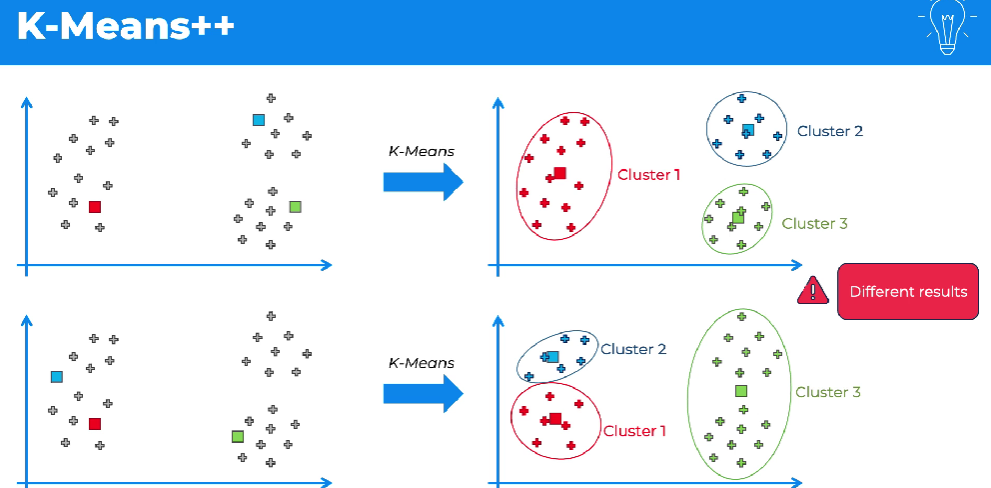

Because we are **randomly choosing the K centroids** in the dataset, there is **a chance that the resulting cluster is different for each model with the same K value**. To handle this, we need to use **K-Means++**.
1.   After finding the optimal value of K, in K-Mean++, we would first **randomly select one centroid**.
2.   Select the next cluster centroid from the remaining data points with **probability proportional to the distance squared to the nearest cluster center.** That is, we are calculating the **squared distance from all points to their corresponding nearest centroid and then select the point with the largest value to be the next centroid.**
3.   Repeat the above step until K centroids are found.



## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
# two features for visualization
X = dataset.iloc[:, 3:].values

## Using the elbow method to find the optimal number of clusters

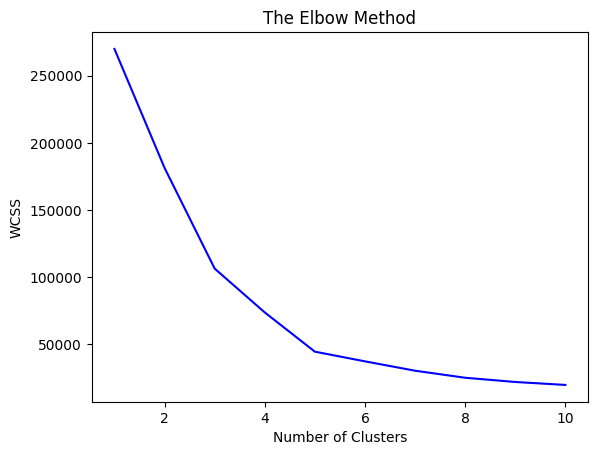

In [ ]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1, 11), WCSS, c='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

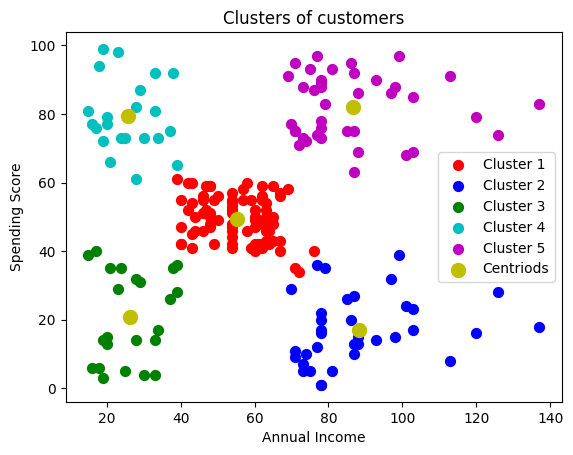

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='r', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='b', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='g', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c='c', label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c='m', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='y', label='Centriods')

plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()